In [2]:
'''
import numpy as np
import pandas as pd
df=pd.read_csv("bank-full.csv")
df.shape
'''

(45211, 1)

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv("bank-full.csv")
df.shape

(45211, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
#finding value counts
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#Label Encoding the obj Dtypes
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.select_dtypes(include=["object"]):
    df[column] = LE.fit_transform(df[column])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [11]:
#choosing X and Y variables
Y=df["y"]
x=df.iloc[:,0:16]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [12]:
#standardization will fit the values b/w -3 to +3

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
#giving columns names to the converted data
SS_x.columns = list(x)
SS_x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [13]:
#Data partition
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(SS_x,Y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 16)
(13564, 16)
(31647,)
(13564,)


In [16]:
#fitting model
from sklearn.linear_model import LogisticRegression
logrec = LogisticRegression()
#model fitting
logrec.fit(x_train,y_train)
#calculatin bias Bo
print("intercept value",logrec.intercept_)
#calculatin coef B1
print("coefficient value",logrec.coef_)

intercept value [-2.69406414]
coefficient value [[ 0.10069462  0.05461834  0.15437625  0.15997975 -0.03562639  0.05819667
  -0.49885654 -0.24235378 -0.55552143 -0.03805236  0.09849826  1.01002617
  -0.414427    0.34881817  0.19290227  0.19699346]]


In [19]:
#model prediction
logrec.fit(x_train,y_train)
y_pred_train = logrec.predict(x_train)
y_pred_test = logrec.predict(x_test)
#
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_train,y_pred_train)
ac2=accuracy_score(y_test,y_pred_test)
print("Trainig accuracy",ac1.round(3))
print("Test accuracy",ac2.round(3))

Trainig accuracy 0.892
Test accuracy 0.889


In [20]:
#cross validation by LogisticRegression
#cross validation method
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logrec = LogisticRegression()
#
training_accuracy = []
test_accuracy = []
for p in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(SS_x,Y,test_size=0.30,random_state=p)
    logrec.fit(x_train,y_train)
    y_pred_train = logrec.predict(x_train)
    y_pred_test = logrec.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
print("Cross validation Trainig accuracy for : ",np.mean(training_accuracy).round(2))
print("Cross validation Test accuracy for : ",np.mean(test_accuracy).round(2))
print("Variance between Training and Testing : ",(ac1-ac2).round(3))

Cross validation Trainig accuracy for :  0.89
Cross validation Test accuracy for :  0.89
Variance between Training and Testing :  -0.0


In [21]:
#so my model predicted 89% correct as client has subscribed a term deposit yes as YES and no as NO

In [23]:
# Caluculating the metrics for the logistic regression
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
CM=confusion_matrix(y_train,y_pred_train)
CM

array([[27391,   546],
       [ 2884,   826]], dtype=int64)

In [26]:
#Calculating Sensitivity,Precision,F1_Score 
R_score=recall_score(y_train,y_pred_train)
print("sensitivity is ",R_score.round(2))
precision=precision_score(y_train,y_pred_train)
print("Precision is ",precision.round(2))
F1_Score=f1_score(y_train,y_pred_train)
print("f1 is ",F1_Score.round(2))

sensitivity is  0.22
Precision is  0.6
f1 is  0.33


In [27]:
#----------------------Predicting Probabilities of X ----------------------------
logrec.predict_proba(x)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [30]:
#Creating a extra colomn of x probabilites to the main data with name y_prob
df["y_prob"]=logrec.predict_proba(SS_x)[:,1]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_prob
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0.033836
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0.020658
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0.004935
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0.018392
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0.088343


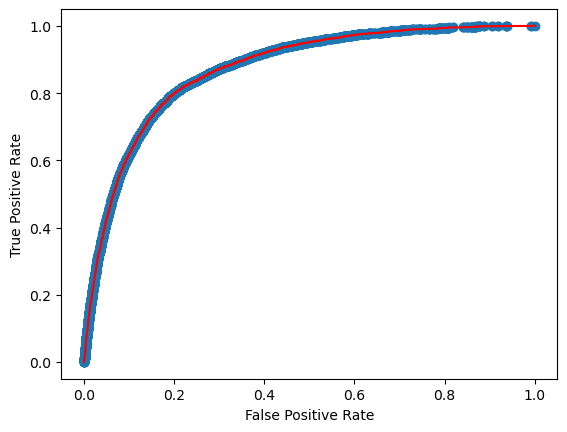

AUC Score 0.8712


In [34]:
#-------------ROC CURVE---------------------------------------------------
#roc curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,NA=roc_curve(Y,df["y_prob"])
#
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("AUC Score",roc_auc_score(Y,df["y_prob"]).round(4))

In [35]:
# Our AUC Score is 87%., means our model is a good model

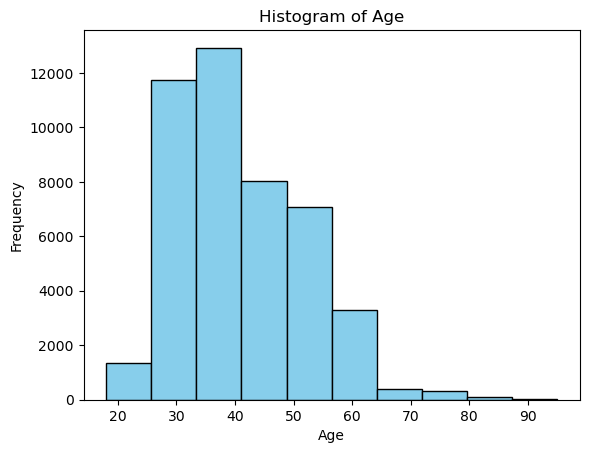

In [45]:
#Create histogram for age variable
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

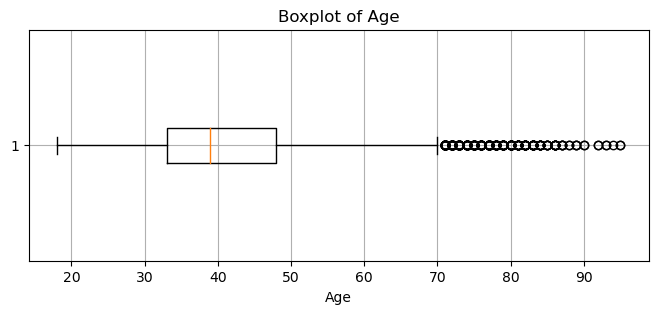

In [49]:
#Create Boxplot for age variable
import matplotlib.pyplot as plt
# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 3))
plt.boxplot(df['age'], vert=False)  # vert=False for horizontal boxplot
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

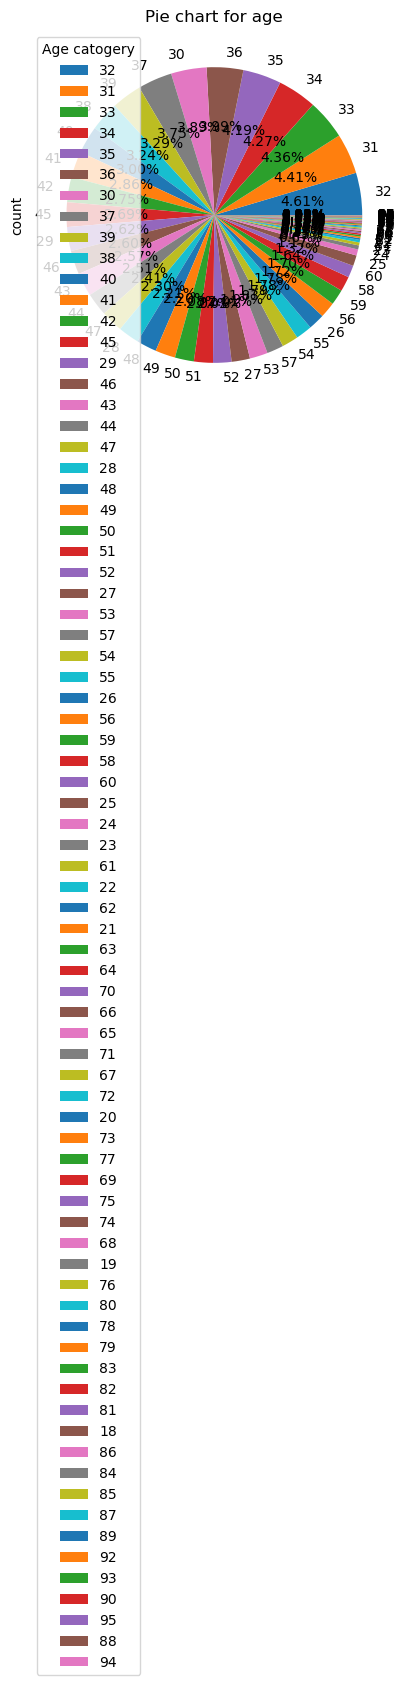

In [50]:
##-------------------Univariate analysis-----------------------------------------------
#constructing pie-chart for Age variable value counts

import matplotlib.pyplot as plt
df['age'].value_counts().plot(kind='pie',autopct='%1.2f%%')
#autopct='%1.2f%%' ----> it gives what % of single catogery occupied on entire
plt.legend(title="Age catogery") #gives which color is for which one
plt.title("Pie chart for age")
plt.show()


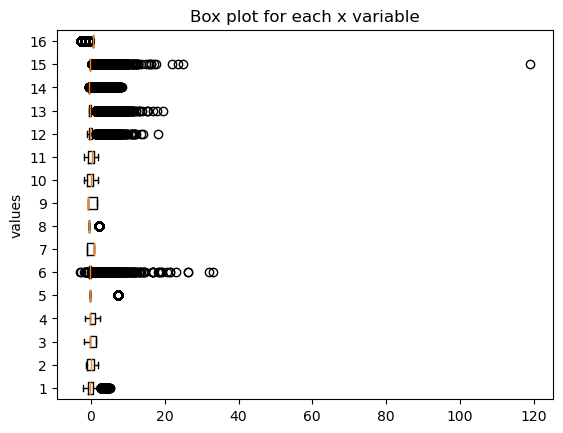

In [44]:
#-------------------Bivariate analysis-----------------------------------------------
#constructing box for all x_variables value counts
#Visualizing the data
import matplotlib.pyplot as plt
plt.boxplot(SS_x,vert=False)
plt.title("Box plot for each x variable")
plt.ylabel("values")
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>,
        <Axes: title={'center': 'loan'}>],
       [<Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'poutcome'}>]], dtype=object)

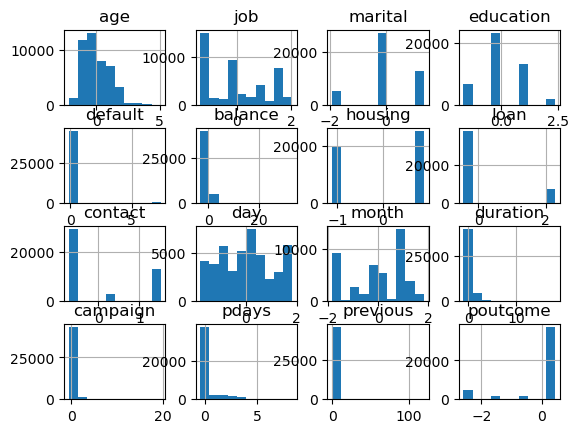

In [36]:
#-------------------Bivariate analysis-----------------------------------------------
#constructing histogram for all x_variables value counts
SS_x.hist()

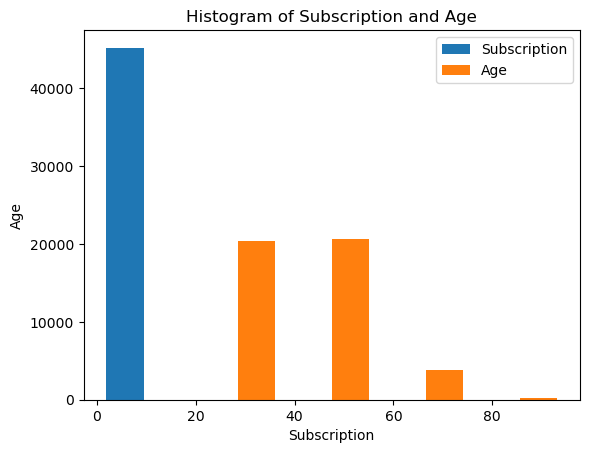

In [39]:
#-------------------bivariate analysis-----------------------------------------------
#constructing histogram for all x_variables(age) and Y_variable
import matplotlib.pyplot as plt
# Plot histogram
plt.hist([df['y'], df['age']], bins=5, label=['Subscription', 'Age'])
plt.xlabel('Subscription')
plt.ylabel('Age')
plt.title('Histogram of Subscription and Age')
plt.legend()
plt.show()

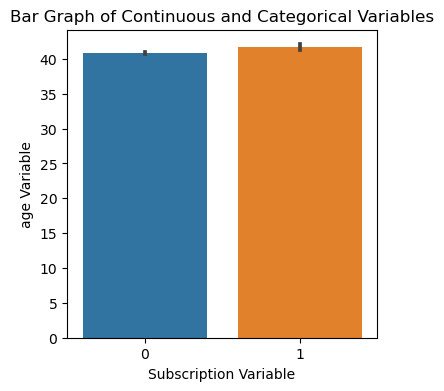

In [42]:
#-------------------bivariate analysis-----------------------------------------------
#constructing histogram for all x_variables(age) and Y_variable
import matplotlib.pyplot as plt
# Plot bar graph
import seaborn as sns
# Plotting
plt.figure(figsize=(4, 4))
sns.barplot(x= df['y'], y= df['age'], data=df)

# Adding labels and title
plt.xlabel('Subscription Variable')
plt.ylabel('age Variable')
plt.title('Bar Graph of Continuous and Categorical Variables')

# Show plot
plt.show()